In [ ]:
#import libraries
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#load data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


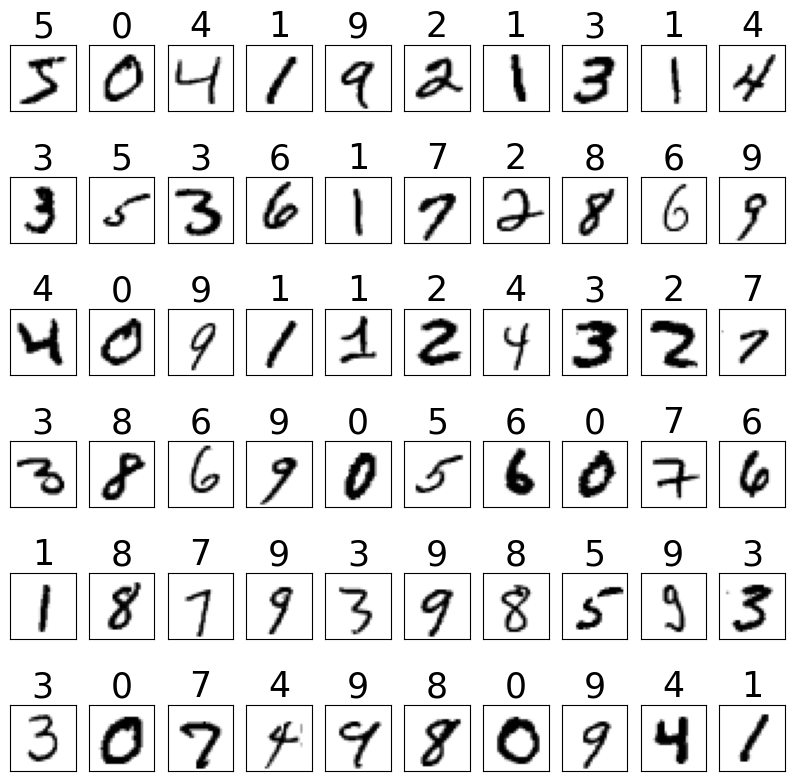

In [ ]:
#preview training data

# Class names
class_names = range(10);

# Preview train images
rowCount = 6;
colCount = 10;

plt.figure(figsize=(10, 10))
for i in range(rowCount * colCount):
    plt.subplot(rowCount, colCount, i+1)    
   
    plt.xticks([])
    plt.yticks([])

    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]], fontsize=25)

In [ ]:
#standardize 
train_images = train_images / 255.0;
test_images = test_images / 255.0;

In [ ]:
#create sequential model with 6 layers 
#flatten layer takes input size of 28 x 28
#dense layer with 64 nodes and tanh activation
#dropout layer with 0.2 to avoid overfitting and set 20% of nodes to 0
#dense layer with 128 nodes and sigmoid activation
#dropout layer with 0.2 to avoid overfitting and set 20% of nodes to 0
#output layer is dense with 10 output nodes representing the probability of recognizing each one from 10 digits
#the higher the score, the better recognition confidence. 
#last layer uses softmax activation to normalize outputs such that their probabilities sum up to 1. It is good for multiclassification

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(64, activation='tanh'),

    keras.layers.Dropout(.2),
                         
    keras.layers.Dense(128, activation='sigmoid'),

    keras.layers.Dropout(.2),
    
    keras.layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
#compile model
#use adam optimizer to minimize the error between true and predicted recognition labels
#loss function calculates the error between true and predicted values
#use accuracy as metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-traina

In [ ]:
#fit the model
#model gives 97% accuracy
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4241 - accuracy: 0.8785 - val_loss: 0.2083 - val_accuracy: 0.9382
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2155 - accuracy: 0.9364 - val_loss: 0.1497 - val_accuracy: 0.9539
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1726 - accuracy: 0.9475 - val_loss: 0.1318 - val_accuracy: 0.9606
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1518 - accuracy: 0.9538 - val_loss: 0.1217 - val_accuracy: 0.9617
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1344 - accuracy: 0.9585 - val_loss: 0.1071 - val_accuracy: 0.9659
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1252 - accuracy: 0.9620 - val_loss: 0.1065 - val_accuracy: 0.9666
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1157 - accuracy: 0.9648 - val_loss: 0.1010 - val_accurac

In [ ]:
# Recognize digits
prediction_result = model.predict(test_images);

# Get predicted labels
predicted_labels = np.argmax(prediction_result, axis=1);

313/313 [==============================] - 1s 2ms/step


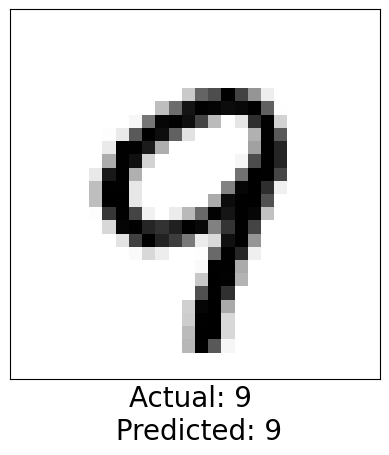

In [ ]:
# Get randomly selected image for preview
preview_image_index = np.random.randint(0, test_images.shape[0] - 1)

plt.figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[preview_image_index], cmap=plt.cm.binary)

plt.xlabel(f"Actual: {test_labels[preview_image_index]} \n Predicted: {predicted_labels[preview_image_index]}", fontsize=20);